# Homework 6 [20pt]
## Introduction to Data Science
### Spring 2023

In this assignment, you will analyze the Baltimore crime data collected by Baltimore Police Department using clustering method. You will apply the K-Means algorithm from scratch, train the model on the train
dataset, evaluate your model using validation dataset, and visualize the clustering results on your test dataset.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("BPD_2012_2017.csv")
print(len(df))

# Drop missing values
df = df.dropna(subset=['Longitude', 'Latitude'])

# Show first 3 rows
df.head(3)

276529


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1


In [4]:
# Select two features from dataframe as dataset 
X = df[['Longitude', 'Latitude']].to_numpy()

print(X.shape)

(274325, 2)


where variable $X$ is the whole dataset we will use for clustering

### Problem 1 Train-Validation-Test Split [3pt]

Use function `train_test_split` in module `sklearn.model_selection` with a `random_state` of `3407` to split the whole dataset $X$ into train, validation and test dataset, with ratio 0.6, 0.2, 0.2.

FYI: To verify your code correctness, the shape of your train, validation and test dataset should exactly be as follows:

- shape of train dataset: (164595, 2)
- shape of validation dataset: (54865, 2)
- shape of test dataset: (54865, 2)

Comment: Usually we don't do train-validation-test split in unsupervised learning. This is just for coding practice.

In [20]:
from sklearn.model_selection import train_test_split

random_state = 3407

X_train, y = train_test_split(X, test_size = 0.4, random_state = 3407)
X_val, X_test = train_test_split(y, test_size = 0.5, random_state = 3407)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(164595, 2)
(54865, 2)
(54865, 2)


### Problem 2 K-Means Fitting and Model Evaluation

Follow the instruction below and finish the three tasks in this problem 

1. Write a function computing the validation inertias, given the trained K-Means Model and the validation dataset. [3pt]


2. Fit KMeans clusters to the training set for K in [2, 14] using a `random_state` of `3407`. [5pt]


3. Plot the training inertias as a function of K. In a separate figure, plot the validation inertias as a function of K, where validation inertias should be obtained by the function in step 1. [2pt]

In [30]:
from sklearn.cluster import KMeans
def validation(kmeans, X_val): 
    '''
    Input: kmeans - your trained K-Means model using sklearn.cluster.KMeans
            X_val - validation dataset
            
    Output: validation inertias
    '''
    traininginertia_list = []
    validationertia_list = []
    for K in range(2,14):
        kmeans = KMeans(n_clusters= K, random_state=3407)
        kmeans.fit(X_train)
        traininginertia_list.append(kmeans.inertia_)

        validationertia = -kmeans.score(X_val)
        validationertia_list.append(validationertia)

    return traininginertia_list, validationertia_list

d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

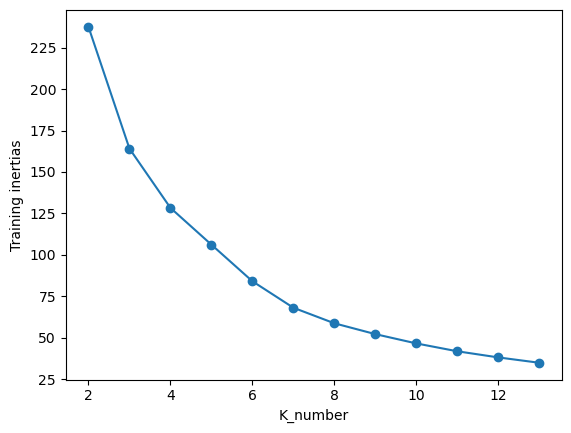

Text(0, 0.5, 'Validation inertias')

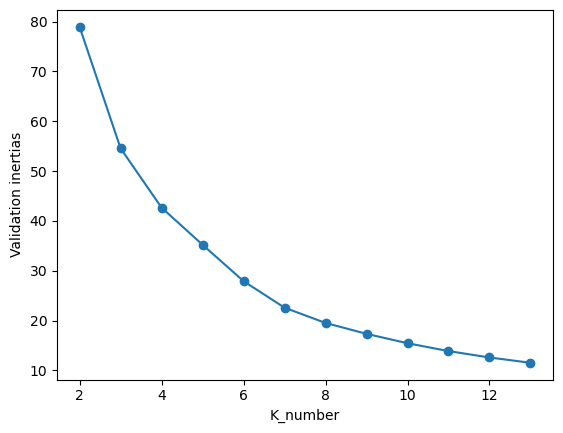

In [34]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

#training_inertia, validation_inertia = validation(0, X_val)
traininginertia_list = []
validationertia_list = []

#fit KMeans clusters to the training set for K in [2,14] using a random_state of 3407
for K in range(2,14):
    kmeans = KMeans(n_clusters= K, random_state=3407)
    kmeans.fit(X_train)
    traininginertia_list.append(kmeans.inertia_)

    validationertia = -kmeans.score(X_val)
    validationertia_list.append(validationertia)

#plot
plt.figure(1)
plt.plot(range(2,14), traininginertia_list, marker='o')
plt.xlabel("K_number")
plt.ylabel("Training inertias")
plt.show()

plt.figure(2)
plt.plot(range(2,14),validationertia_list, marker='o')
plt.xlabel("K_number")
plt.ylabel("Validation inertias")

Based on validation plot, is there a clear "elbow" in the plot?  If so, choose the K value using the elbow method. If not, propose an alternative quantitative method, and specify the K value chosen by your method. Provide a detailed explanation. [2pt]

***Your answer:***
It's a clear elbow. Through the plot, we should choose K=7. This is because the training inertia and validation inertia decreases at a slower rate after K=7. When K=7, adding another cluster does not decrease the inertia by much. The model is effectively capturing the variance in the data at this point.


### Problem 3 Result Visualization


Train your model with the selected number of clusters in problem 2 and  plot the cluster assignments on the test dataset using the *plot_clusters* function. [3pt]

In [35]:
def plot_clusters(kmeans, X_test):
    '''
    Input: kmeans - your trained K-Means model using sklearn.cluster.KMeans
            X_val - test dataset  
    *** DO NOT MODIFY THIS CODE BLOCK ***
    '''
    test_labels = kmeans.predict(X_test)
    plt.figure(figsize=(12,12))
    for i in range(np.max(test_labels)+1):
        plt.scatter(X_test[test_labels == i, 0] , X_test[test_labels == i, 1] , s=2, label = i)
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i, 1], label=i, s=500, marker="*")
    plt.show()

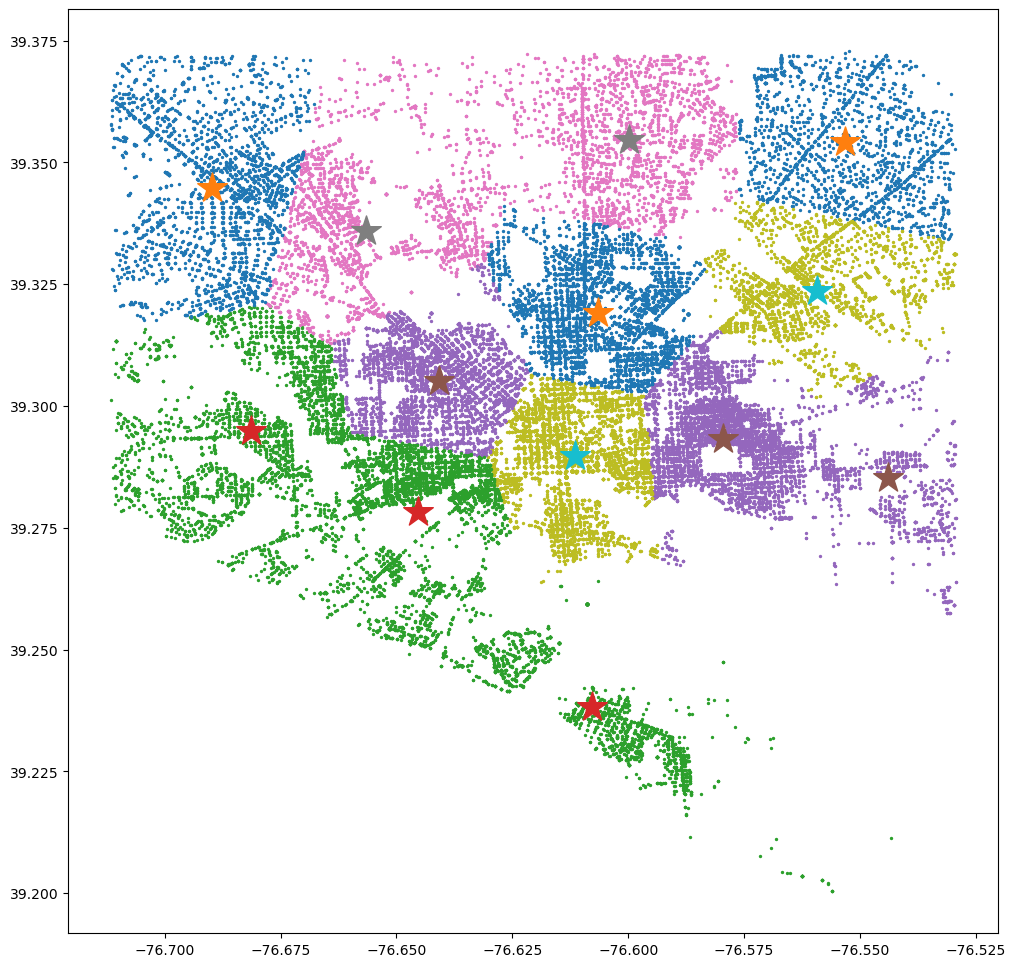

In [36]:
plot_clusters(kmeans, X_test)

[2pt] Do these clusters show a different pattern than what you would expect from uniformly distributed locations? Optionally, you can repeat your evaluation on the pseudo-random uniformly distributed longitudes and lattitudes below to support your answer. But a verbal explanation of your analysis and prediction is also fine. 

In [38]:
min_longitude = X[:,0].min()
max_longitude = X[:,0].max()
min_latitude = X[:,1].min()
max_latitude = X[:,1].max()

X_uniform = np.random.uniform(low=[min_longitude, min_latitude], high=[max_longitude, max_latitude], size=(X.shape[0],2))
X_uniform_train, X_uniform_test = train_test_split(X_uniform, test_size=0.2, random_state=random_state)

print(X_uniform.shape)

(274325, 2)


In [39]:
X_uniform_train, Y = train_test_split(X_uniform, test_size = 0.4, random_state = 3407)
X_uniform_val, X_uniform_test = train_test_split(Y, test_size = 0.5, random_state = 3407)
print(X_uniform_train.shape)
print(X_uniform_val.shape)
print(X_uniform_test.shape)

(164595, 2)
(54865, 2)
(54865, 2)


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

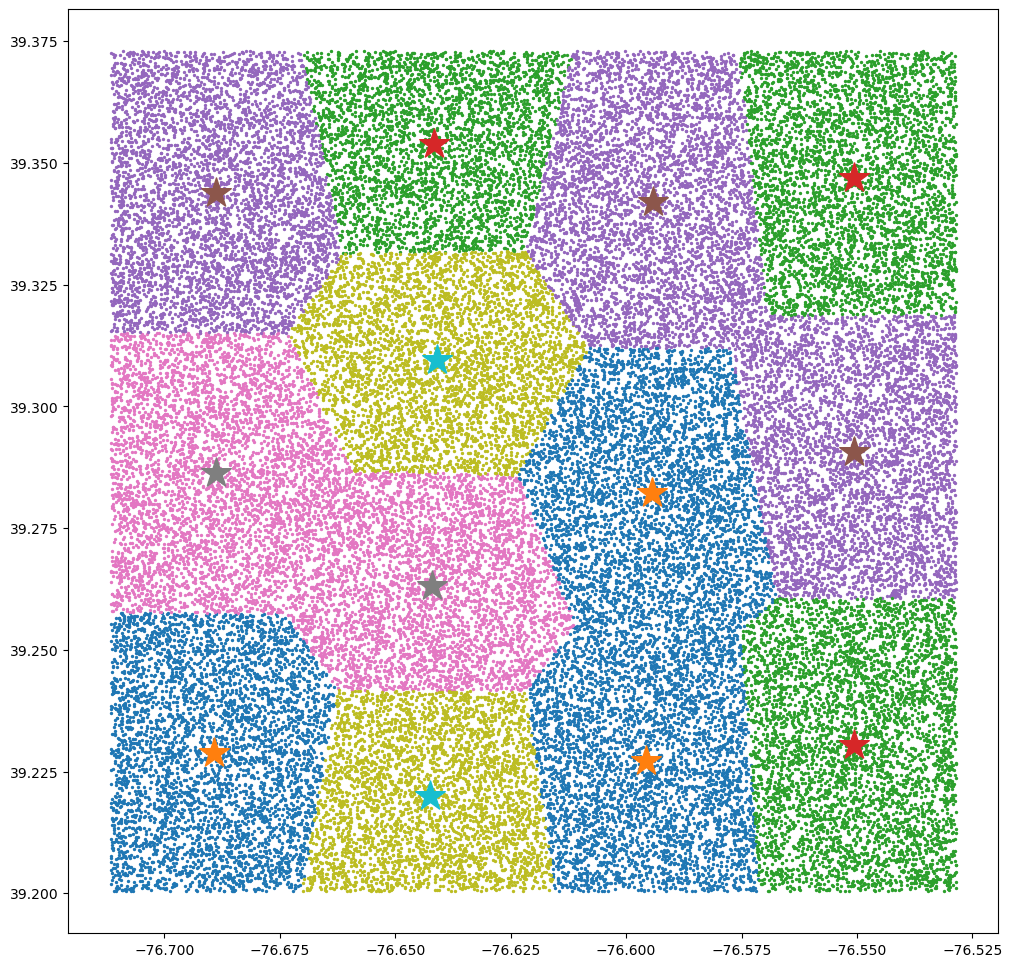

In [40]:
uniform_traininginertia_list = []
uniform_validationertia_list = []

for K in range(2,14):
    uniform_kmeans = KMeans(n_clusters= K, random_state=3407)
    uniform_kmeans.fit(X_uniform_train)
    uniform_traininginertia_list.append(uniform_kmeans.inertia_)

    uniform_validationertia = -uniform_kmeans.score(X_val)
    uniform_validationertia_list.append(uniform_validationertia)

plot_clusters(uniform_kmeans, X_uniform_test)

Answer: From the comparison of the two plots, we can see that the difference is quite large.